<a href="https://colab.research.google.com/github/Enock-Biwott/malaria_classification/blob/main/malaria_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Flatten ,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy
import matplotlib.pyplot as plt

Loading the dataset `malaria` from the tensorflow library pre-spliting the data and displaying and additional information using the flag set.


In [ ]:
 dataset, info = tfds.load('malaria', split='train', with_info=True)
num_classes = info.features['label'].num_classes


Displaying the content of the dataset

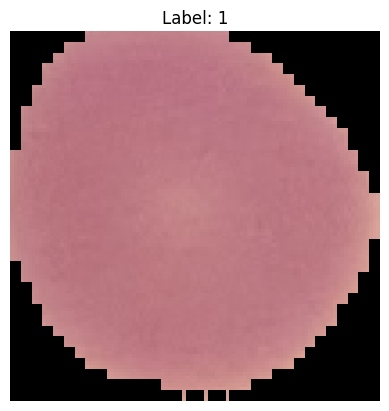

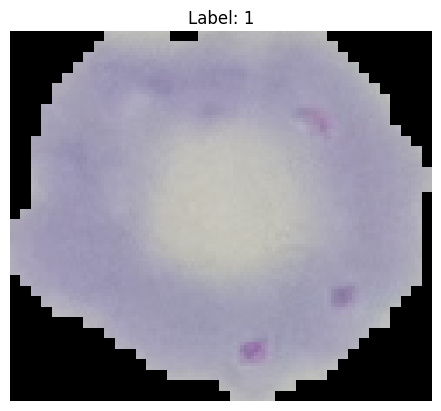

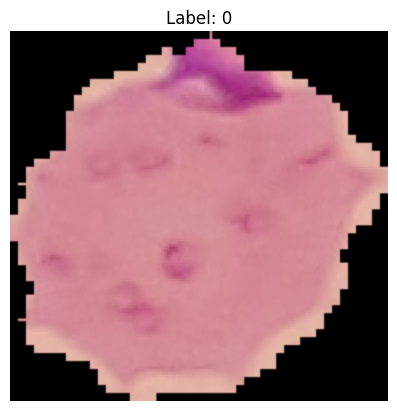

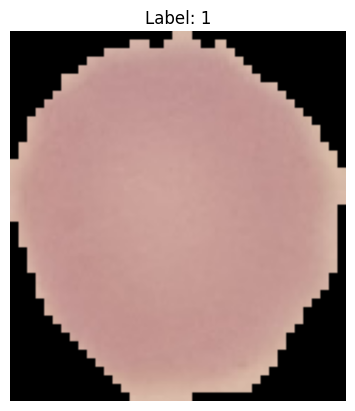

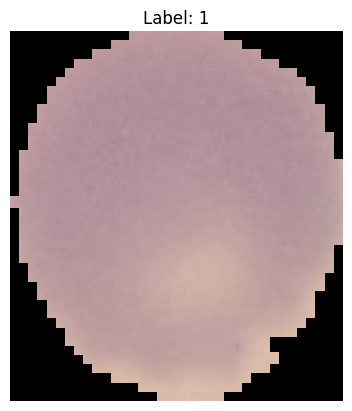

In [ ]:
for example in dataset.take(5):  # Display first 5 examples
    image = example['image']
    label = example['label']

    # Convert image tensor to numpy array
    image_np = image.numpy()

    # Display the image and label
    plt.imshow(image_np)
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [ ]:
img_height,img_width= 128, 128

In [ ]:
#defining batch size
batch_size=32

In [ ]:
dataset_numpy = tfds.as_numpy(dataset)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
train_data = train_datagen.flow_from_dataset(
    dataset_numpy,
    subset='training',  # Specify the training subset
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

AttributeError: 'ImageDataGenerator' object has no attribute 'flow_from_dataset'

In [ ]:

# Generate validation data from the TFDS dataset
validation_data = train_datagen.flow(
    dataset,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation'
)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])






In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

NameError: name 'train_data' is not defined

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

NameError: name 'history' is not defined